In [1]:
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *
from crptmidfreq.utils.common import to_csv

plt.style.use('ggplot')


g_folder = 'res_exploration_v1'
g_reg = StepperRegistry()
clean_folder(g_folder)

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
2025-04-02 14:51:50 - Cleaning folder res_exploration_v1


In [2]:
featd=prepare_klines(start_date='2024-09-01',
                   end_date='2026-01-01',
                   tokens=['ETHUSDT'],
                   folder=g_folder,
                   name=None,
                   r=g_reg
                   )


2025-04-02 14:51:50 - Missing key=use_lazy_dict in cfg for kmeans_sret -- will use default value
2025-04-02 14:51:50 - Missing key=window_volume_wgt in cfg for kmeans_sret -- will use default value
2025-04-02 14:51:50 - prepare_klines start_date=2024-09-01 end_date=2026-01-01
2025-04-02 14:51:50 - Reading data from DuckDB
2025-04-02 14:51:51 - Stepper creating instance res_exploration_v1 None_cnt_exists
2025-04-02 14:51:53 - Stepper creating instance res_exploration_v1 None_close_diff1
2025-04-02 14:51:53 - Stepper creating instance res_exploration_v1 None_tret_clip
2025-04-02 14:51:53 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200
2025-04-02 14:51:54 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200_qtl


In [ ]:
icfg = dict(
        gaps_lag=1,
        gaps_window=24*60*5,
        gaps_th=4.0,
        gaps_ewm_windows=[10],
    )
featd = gap_feats_loc(featd,
                                incol='tret',
                                folder=g_folder,
                                name=None,
                                r=g_reg,
                                cfg=icfg)



2025-04-02 14:51:54 - Stepper creating instance res_exploration_v1 None_tret_ewmstd7200
2025-04-02 14:51:55 - Stepper creating instance res_exploration_v1 None_tret_cumsum
2025-04-02 14:51:55 - Stepper creating instance res_exploration_v1 None_tret_cumsum_max7200
2025-04-02 14:51:57 - Stepper creating instance res_exploration_v1 None_tret_cumsum_max7200_lag1
2025-04-02 14:51:57 - Stepper creating instance res_exploration_v1 None_tret_cumsum_max7200
2025-04-02 14:51:59 - Stepper creating instance res_exploration_v1 None_tret_cumsum_min7200_lag1
2025-04-02 14:51:59 - Stepper creating instance res_exploration_v1 None_gap_7200x1x4.0_ewm10


In [4]:
df=pd.DataFrame({k:featd[k] for k in featd.keys()})
df=df.set_index('close_time')
df=df.sort_index()
to_csv(df,'check_gaps')

Saved : /Users/sachadrevet/data_tmp/analysis/check_gaps.csv


['sigf_timeofday', 'sigf_dayofweek', 'sigf_wgt', 'sigf_gap_7200x1x4.0_ewm10']


<Axes: title={'center': 'GAPS example'}, xlabel='close_time'>

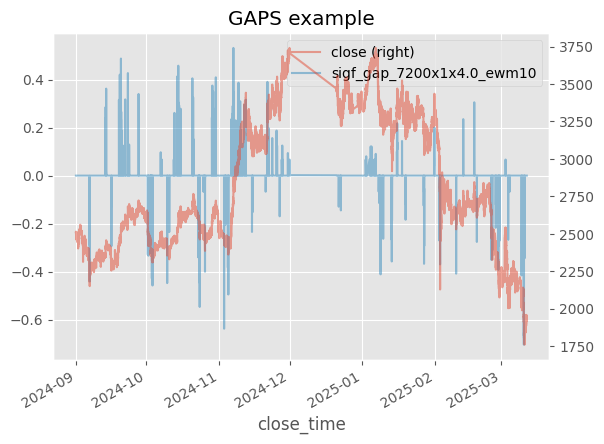

In [5]:
sigfs=get_sigf_cols(featd)
print(sigfs)
close_col='close'
# ,'gap_up_evt','gap_dn_evt'
df[[close_col,sigfs[-1]]]\
    .plot(title='GAPS example',secondary_y=close_col,alpha=0.5)